<center style="font-size:70px;  font-family:League Gothic, Impact, sans-serif;"> SimpleHypergraph.jl </center>
<br><br><br><br><br>
<center style="font-size:30px;font-family:League Gothic, Impact, sans-serif;">Carmine Spagnuolo,</center><br>
<center style="font-size:30px;font-family:League Gothic, Impact, sans-serif;">ISISLab, Università degli Studi di Salerno</center>


# SimpleHypergraph.jl

- A Julia library for hypegraphs manipulation. 
- Version v0.1.6, October 2019.
- Available on a GitHub public  repository: [https://github.com/pszufe/SimpleHypergrap
hs.jl](https://github.com/pszufe/SimpleHypergraphs.jl)
-  APIs are designed in similar fashion of the popular library for graph manipulation `LightGraphs.jl`.
- Documentation: [https://pszufe.github.io/SimpleHypergraphs.jl/stable](https://pszufe.github.io/SimpleHypergraphs.jl/stable)
- *SimpleHypergraphs.jl --- Novel Software Framework for Modelling and Analysis of Hypergraphs*. A. Antelmi, G. Cordasco, B. Kaminski, P. Pralat, V. Scarano, C. Spagnuolo, and P. Szufel. Proceedings of the 16th Workshop on Algorithms and Models for the Web Graph (WAW 2019), Lecture Notes in Computer Science 11631, Springer, 2019.

# State-of-the-Art (1)

* _Chapel HyperGraph Library (CHGL)_ is a library for the emerging parallel language Chapel.

* _HyperX_ is a scalable framework for processing hypergraphs and learning algorithm built on top of Apache Spark. 

* _Pygraph_ is a pure Python library for graph manipulation released under the MIT license. 

* _Multihypergraph_ is a Python package for graphs released under GPL license. 

* _HyperNetX_  is a Python preliminary library released in 2018 under the Battelle Memorial Institute licence.


# State-of-the-Art (2)

* _Halp_ is a Python software package providing both a directed and an undirected hypergraph implementation as well as several important and classical algorithms.

* _HyperGraphLib_ is a C++ implementation of hypergraphs that exploits the Boost Library.

* _Iper_ is a JavaScript library for hypergraphs released under MIT license. 

* _NetworkR_  is an R package with a set of functions for analyzing social and economic networks including hypergraphs.

* _Gspbox_ is an easy to use Matlab toolbox that performs a wide variety of operations on a graph.


# Yet Another Hypergraphs Library?

- Chapel, C and C++ based libraries provide  good performance but do not provide any kind of visualization.
-  Python  and JavaScript based libraries do not allow programmers to easily manage big hypergraphs.
- Many of them do not provide algorithms for hypergraphs.
- All libraries do not support meta-data information for vertices and hyperedges!

# Let's start using SimpleHypergraph.jl

- Download and install the package `SimpleHypergraphs.jl` in your project using the Julia Package manager.

In [48]:
] rm SimpleHypergraphs.jl

  Updating `C:\Users\aless\.julia\environments\v1.0\Project.toml`
  [aa4a32ff] - SimpleHypergraphs v0.1.6 #hg_visualization (https://github.com/pszufe/SimpleHypergraphs.jl.git)
  Updating `C:\Users\aless\.julia\environments\v1.0\Manifest.toml`
  [aa4a32ff] - SimpleHypergraphs v0.1.6 #hg_visualization (https://github.com/pszufe/SimpleHypergraphs.jl.git)


In [49]:
] add SimpleHypergraphs.jl#hg_visualization

  Updating git-repo `https://github.com/pszufe/SimpleHypergraphs.jl.git`
 Resolving package versions...
  Updating `C:\Users\aless\.julia\environments\v1.0\Project.toml`
  [aa4a32ff] + SimpleHypergraphs v0.1.6 #hg_visualization (https://github.com/pszufe/SimpleHypergraphs.jl.git)
  Updating `C:\Users\aless\.julia\environments\v1.0\Manifest.toml`
  [aa4a32ff] + SimpleHypergraphs v0.1.6 #hg_visualization (https://github.com/pszufe/SimpleHypergraphs.jl.git)


- Include the package in your code by through the keyword **using**;
- You cannot modify or extend a function of the included module.

In [2]:
using SimpleHypergraphs

# Hypergraph representation
- `H=(V,E)` as an `n x k` matrix, where `n` is the number of vertices and `k` is the number of hyperedges.
- Stores in-memory a hypergraph using its matrix representation.
- Vertices and hyperedges are uniquely identified by progressive integer ids, corresponding to rows `(1,...,n)` and columns `(1,...,k)`, respectively.
-  Each position `(i,j)` of the matrix denotes the weight of vertex `i` within the hyperedge `j`.

# Creating your first hypergraph...

- Hypergraph of *5 nodes and 4 hyperedges*.
- Hyperedges have a real value as weight, we use the Julia type *Float64*.

In [3]:
#Hypergraph{T}(n,k) where {T<:Real}
h = Hypergraph{Float64}(5,4)
h[1:3,1] .= 1.5
h[3,4] = 2.5
h[2,3] = 3.5
h[4,3:4] .= 4.5
h[5,4] = 5.5
h[5,2] = 6.5

h

5×4 Hypergraph{Float64,Nothing,Nothing}:
 1.5        nothing   nothing   nothing
 1.5        nothing  3.5        nothing
 1.5        nothing   nothing  2.5     
  nothing   nothing  4.5       4.5     
  nothing  6.5        nothing  5.5     

# ...And visualizing it

In [5]:
plot(h, type="color-edge")

HTML{String}("<head>\n<link rel=\"stylesheet\" type=\"text/css\" href=\"https://isislab-unisa.github.io/hypergraphs-plot/css/color-edge-style.css\">\n</head>\n<div class=\"hg-plot2\"></div>\n<script src=\"https://isislab-unisa.github.io/hypergraphs-plot//bundle.v1.0.js\"></script>\n<script>\nhgplot.drawing.hgColorEdgePlot({graph:{\n    \"nodes\":[\n        {\"id\":\"1\" , \"links\":[\"1\"]},\n        {\"id\":\"2\" , \"links\":[\"1\",\"3\"]},\n        {\"id\":\"3\" , \"links\":[\"1\",\"4\"]},\n        {\"id\":\"4\" , \"links\":[\"3\",\"4\"]},\n        {\"id\":\"5\" , \"links\":[\"2\",\"4\"]}\n    ],\n    \"links\":[\n        {\"id\":\"1\", \"nodes\": [\"1\",\"2\",\"3\"]},\n        {\"id\":\"2\", \"nodes\": [\"5\"]},\n        {\"id\":\"3\", \"nodes\": [\"2\",\"4\"]},\n        {\"id\":\"4\", \"nodes\": [\"3\",\"4\",\"5\"]}\n    ],\n    \"nodelinks\":[\n                    {\"node\":\"1\",\"link\":\"1\",\"value\":\"1.5\"},\n                    {\"node\":\"2\",\"link\":\"1\",\"value\":\"1.5\"},\n                    {\"node\":\"2\",\"link\":\"3\",\"value\":\"3.5\"},\n                    {\"node\":\"3\",\"link\":\"1\",\"value\":\"1.5\"},\n                    {\"node\":\"3\",\"link\":\"4\",\"value\":\"2.5\"},\n                    {\"node\":\"4\",\"link\":\"3\",\"value\":\"4.5\"},\n                    {\"node\":\"4\",\"link\":\"4\",\"value\":\"4.5\"},\n                    {\"node\":\"5\",\"link\":\"2\",\"value\":\"6.5\"},\n                    {\"node\":\"5\",\"link\":\"4\",\"value\":\"5.5\"}\n        ]\n    }},{preferences:{\"colorEdges\":\"default\",\"colorNodes\":\"default\",\"sizeNodes\":\"default\"}},{idColorEdge:\"2\"});\n</script>\n")

# Basic Functionalities

- **add\_vertex!**, adds a vertex to a given hypergraph _H_.
- **add\_hyperedge!**, adds a hyperedge to a given hypergraph _H_.


In [6]:
add_vertex!(h) == 6
add_hyperedge!(h) == 5

h[5,5] = 1.2
h[6,5] = 1.3

h

6×5 Hypergraph{Float64,Nothing,Nothing}:
 1.5        nothing   nothing   nothing   nothing
 1.5        nothing  3.5        nothing   nothing
 1.5        nothing   nothing  2.5        nothing
  nothing   nothing  4.5       4.5        nothing
  nothing  6.5        nothing  5.5       1.2     
  nothing   nothing   nothing   nothing  1.3     

# Basic Functionalities (2)

- **set\_vertex\_meta!**, sets a new meta value new\_value for vertex id in _H_.
- **get\_vertex\_meta** returns a meta value stored at vertex _id_ in _H_.


In [7]:
h = Hypergraph{Float64,String,String}(5,4)
h[1:3,1] .= 1.5
h[3,4] = 2.5
h[2,3] = 3.5
h[4,3:4] .= 4.5
h[5,4] = 5.5
h[5,2] = 6.5

set_vertex_meta!(h,"Bob",1)
get_vertex_meta(h,1)

"Bob"

- **set\_hyperedge\_meta!**, sets a new meta value new\_value for hyperedge id in _H_.
- **get\_hyperedge\_meta** returns a meta value stored at hyperedge _id_ in _H_.

In [8]:
set_hyperedge_meta!(h,"Home",1)
get_hyperedge_meta(h,1)

"Home"

# Other ways to create a hypergraph
- You can create a hypergraph `H` from a matrix `m`
- You can either attach metadata to vertices and hyperedges directly when you create the hypergraph `H` from its matrix representation.

In [9]:
m = [1       nothing 4       nothing
     2       3       nothing nothing
     nothing nothing 5       nothing
     nothing nothing 6       nothing]

h1 = Hypergraph{String}(m; v_meta=["a", "b", "c", "d"])

h1

4×4 Hypergraph{Int64,String,Nothing}:
 1          nothing  4         nothing
 2         3          nothing  nothing
  nothing   nothing  5         nothing
  nothing   nothing  6         nothing

In [10]:
get_vertex_meta(h1, 1)

"a"

In [11]:
h2 = Hypergraph{String, Float64}(m; v_meta=["a", "b", "c", "d"], he_meta=[10.2, 11.3, 12.4, 13.5])

h2

4×4 Hypergraph{Int64,String,Float64}:
 1          nothing  4         nothing
 2         3          nothing  nothing
  nothing   nothing  5         nothing
  nothing   nothing  6         nothing

In [12]:
get_hyperedge_meta(h2,1)

10.2

# Other ways to create a hypergraph  (1)
- You can create a hypergraph `H` from a LightGraph.Graph `g`

In [60]:
] add LightGraphs

 Resolving package versions...
  Updating `C:\Users\aless\.julia\environments\v1.0\Project.toml`
 [no changes]
  Updating `C:\Users\aless\.julia\environments\v1.0\Manifest.toml`
 [no changes]


In [13]:
using LightGraphs

In [14]:
g = SimpleGraph(3);

add_edge!(g, 1, 2);
add_edge!(g, 2, 3);

hg = Hypergraph(g)

hg

3×2 Hypergraph{Bool,Nothing,Nothing}:
 true             nothing
 true         true       
     nothing  true       

# Basic Functionalities (3)

- Get vertices from a hypergraph a for a given hyperedge `he_id`.


In [15]:
getvertices(h,1)

Dict{Int64,Float64} with 3 entries:
  2 => 1.5
  3 => 1.5
  1 => 1.5

In [16]:
h

5×4 Hypergraph{Float64,String,String}:
 1.5        nothing   nothing   nothing
 1.5        nothing  3.5        nothing
 1.5        nothing   nothing  2.5     
  nothing   nothing  4.5       4.5     
  nothing  6.5        nothing  5.5     

- Get hyperedges for a given vertex `v_id` in a hypergraph `h`.

In [17]:
gethyperedges(h,1)

Dict{Int64,Float64} with 1 entry:
  1 => 1.5

# Basic functionalities (4)
- Remove a vertex `v` from a hypergraph `h`

In [18]:
h

5×4 Hypergraph{Float64,String,String}:
 1.5        nothing   nothing   nothing
 1.5        nothing  3.5        nothing
 1.5        nothing   nothing  2.5     
  nothing   nothing  4.5       4.5     
  nothing  6.5        nothing  5.5     

In [19]:
remove_vertex!(h, 1)

h

4×4 Hypergraph{Float64,String,String}:
  nothing  6.5        nothing  5.5     
 1.5        nothing  3.5        nothing
 1.5        nothing   nothing  2.5     
  nothing   nothing  4.5       4.5     

Note that running this function will cause reordering of vertices in the hypergraph `h`: the vertex `v` will replaced by the last vertex of the hypergraph and the list of vertices will be shrunk.

# Hypergraph info

- `size`: returns the size of Hypergraph `h`. The result is a tuple of the number of vertices and the number of hyperedges.

In [20]:
size(h)

(4, 4)

- `nhv`  and `nhe`: return the number of vertices and hyperedges in the hypergraph `h`, respectively.

In [21]:
nhv(h)

4

In [22]:
nhe(h)

4

# Hypergraph Transformations as LightGraphs' simple graphs
The goal of those methods is to provide a way to manipulate a hypergraph using the methods from the `LightGraphs.jl` library. This has been achieved by providing types that are subtypes of the `LightGraphs.SimpleGraphs.AbstractSimpleGraph{Int}` type along with appropiate methods.

# Hypergraph Transformations

## BipartiteView

Bipartite representation of a hypergraph `H`.  An incidence graph of hypergraph `H=(V,E)`; that is, a bipartite graph `IG(H)` with vertex set `S=V union E` , and where `v in V` and `e in E` are adjacent if and only if `v in e`.

![](assets/res/hytac-2019/hbipartite.png)

## BipartiteView

- Create a graph `G` from the  `BipartiteView` of `H`.
- We need to import the library `LightGraphs` for manipulating graph objects.
- Note this is a view - changes to the original hypergraph will be automatically reflected in the view.

In [23]:
import LightGraphs

h = Hypergraph{Float64}(5,4)
h[1:3,1] .= 1.5
h[3,4] = 2.5
h[2,3] = 3.5
h[4,3:4] .= 4.5
h[5,4] = 5.5
h[5,2] = 6.5

add_vertex!(h) == 6
add_hyperedge!(h) == 5

h[5,5] = 1.2
h[6,5] = 1.3

h

plot(h, type="color-edge")

HTML{String}("<head>\n<link rel=\"stylesheet\" type=\"text/css\" href=\"https://isislab-unisa.github.io/hypergraphs-plot/css/color-edge-style.css\">\n</head>\n<div class=\"hg-plot3\"></div>\n<script src=\"https://isislab-unisa.github.io/hypergraphs-plot//bundle.v1.0.js\"></script>\n<script>\nhgplot.drawing.hgColorEdgePlot({graph:{\n    \"nodes\":[\n        {\"id\":\"1\" , \"links\":[\"1\"]},\n        {\"id\":\"2\" , \"links\":[\"1\",\"3\"]},\n        {\"id\":\"3\" , \"links\":[\"1\",\"4\"]},\n        {\"id\":\"4\" , \"links\":[\"3\",\"4\"]},\n        {\"id\":\"5\" , \"links\":[\"2\",\"4\",\"5\"]},\n        {\"id\":\"6\" , \"links\":[\"5\"]}\n    ],\n    \"links\":[\n        {\"id\":\"1\", \"nodes\": [\"1\",\"2\",\"3\"]},\n        {\"id\":\"2\", \"nodes\": [\"5\"]},\n        {\"id\":\"3\", \"nodes\": [\"2\",\"4\"]},\n        {\"id\":\"4\", \"nodes\": [\"3\",\"4\",\"5\"]},\n        {\"id\":\"5\", \"nodes\": [\"5\",\"6\"]}\n    ],\n    \"nodelinks\":[\n                    {\"node\":\"1\",\"link\":\"1\",\"value\":\"1.5\"},\n                    {\"node\":\"2\",\"link\":\"1\",\"value\":\"1.5\"},\n                    {\"node\":\"2\",\"link\":\"3\",\"value\":\"3.5\"},\n                    {\"node\":\"3\",\"link\":\"1\",\"value\":\"1.5\"},\n                    {\"node\":\"3\",\"link\":\"4\",\"value\":\"2.5\"},\n                    {\"node\":\"4\",\"link\":\"3\",\"value\":\"4.5\"},\n                    {\"node\":\"4\",\"link\":\"4\",\"value\":\"4.5\"},\n                    {\"node\":\"5\",\"link\":\"2\",\"value\":\"6.5\"},\n                    {\"node\":\"5\",\"link\":\"4\",\"value\":\"5.5\"},\n                    {\"node\":\"5\",\"link\":\"5\",\"value\":\"1.2\"},\n                    {\"node\":\"6\",\"link\":\"5\",\"value\":\"1.3\"}\n        ]\n    }},{preferences:{\"colorEdges\":\"default\",\"colorNodes\":\"default\",\"sizeNodes\":\"default\"}},{idColorEdge:\"3\"});\n</script>\n")

## Creating a Bipartite View of H..

In [24]:
b = LightGraphs.SimpleGraph(BipartiteView(h))

{11, 11} undirected simple Int64 graph

## ... and visualizing it
- Import the `GraphPlot` modulte to visualize the graph `G`.

In [25]:
] add GraphPlot

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %          ]  72.7 % Resolving package versions...
 Installed Parsers ──────── v0.3.8
 Installed BinaryProvider ─ v0.5.8
 Installed JuliaFormatter ─ v0.1.25
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
  [b99e7846] ↑ BinaryProvider v0.5.7 ⇒ v0.5.8
  [98e50ef6] ↑ JuliaFormatter v0.1.22 ⇒ v0.1.25
  [69de0a69] ↑ Parsers v0.3.7 ⇒ v0.3.8


In [26]:
using GraphPlot

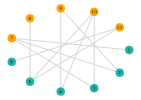

In [27]:
#nodes membership
nodes, hyperedges = size(h)
nodes_membership = fill(1, nodes)
hyperedges_membership = fill(2, hyperedges)

membership = vcat(nodes_membership, hyperedges_membership)

nodecolor = ["lightseagreen", "orange"]
#membership color
nodefillc = nodecolor[membership]

gplot(b, nodefillc=nodefillc, nodelabel=1:LightGraphs.nv(b), layout=circular_layout)

# Hypergraph Transformations

## TwosectionView

2-section representation of a hypergraph `H` .  Denoted by `[H]2` , it is a graph whose vertices are the vertices of `H` and where two distinct vertices form an edge if and only if they are in the same hyperedge of `H`.  The weight of an edge  corresponds to the number of hyperedges that contain both the endpoints of the edge.

![](assets/res/hytac-2019/h2section.png)


## TwosectionView

- Create a graph `G` from the  `TwosectionView` of `H`.
- We need to import the library `LightGraphs` for manipulating graph objects.
- This is a view - changes to the original hypergraph will be automatically reflected in the view.

<section data-background-transition="zoom">
<br>

## Creating a TwoSection View of H

In [28]:
h

6×5 Hypergraph{Float64,Nothing,Nothing}:
 1.5        nothing   nothing   nothing   nothing
 1.5        nothing  3.5        nothing   nothing
 1.5        nothing   nothing  2.5        nothing
  nothing   nothing  4.5       4.5        nothing
  nothing  6.5        nothing  5.5       1.2     
  nothing   nothing   nothing   nothing  1.3     

In [29]:
t = LightGraphs.SimpleGraph(TwoSectionView(h));

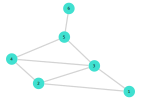

In [30]:
gplot(t, nodelabel=1:LightGraphs.nv(t))

# Hypergraph Visualization

SimpleHypergraph.jl provides several kind of visualization using the _plot_ function.

- `color-edge` provides a visualization of hyperedges as a single edge that connects several vertices.
- `radial` provides a radial visualization of an hypergraph.
- `venn` (ongoing) classical visualization of an hypergraph (not trivial).

## Color-Edge Visualization

In [31]:
h

6×5 Hypergraph{Float64,Nothing,Nothing}:
 1.5        nothing   nothing   nothing   nothing
 1.5        nothing  3.5        nothing   nothing
 1.5        nothing   nothing  2.5        nothing
  nothing   nothing  4.5       4.5        nothing
  nothing  6.5        nothing  5.5       1.2     
  nothing   nothing   nothing   nothing  1.3     

In [32]:
plot(h, type="color-edge")

HTML{String}("<head>\n<link rel=\"stylesheet\" type=\"text/css\" href=\"https://isislab-unisa.github.io/hypergraphs-plot/css/color-edge-style.css\">\n</head>\n<div class=\"hg-plot4\"></div>\n<script src=\"https://isislab-unisa.github.io/hypergraphs-plot//bundle.v1.0.js\"></script>\n<script>\nhgplot.drawing.hgColorEdgePlot({graph:{\n    \"nodes\":[\n        {\"id\":\"1\" , \"links\":[\"1\"]},\n        {\"id\":\"2\" , \"links\":[\"1\",\"3\"]},\n        {\"id\":\"3\" , \"links\":[\"1\",\"4\"]},\n        {\"id\":\"4\" , \"links\":[\"3\",\"4\"]},\n        {\"id\":\"5\" , \"links\":[\"2\",\"4\",\"5\"]},\n        {\"id\":\"6\" , \"links\":[\"5\"]}\n    ],\n    \"links\":[\n        {\"id\":\"1\", \"nodes\": [\"1\",\"2\",\"3\"]},\n        {\"id\":\"2\", \"nodes\": [\"5\"]},\n        {\"id\":\"3\", \"nodes\": [\"2\",\"4\"]},\n        {\"id\":\"4\", \"nodes\": [\"3\",\"4\",\"5\"]},\n        {\"id\":\"5\", \"nodes\": [\"5\",\"6\"]}\n    ],\n    \"nodelinks\":[\n                    {\"node\":\"1\",\"link\":\"1\",\"value\":\"1.5\"},\n                    {\"node\":\"2\",\"link\":\"1\",\"value\":\"1.5\"},\n                    {\"node\":\"2\",\"link\":\"3\",\"value\":\"3.5\"},\n                    {\"node\":\"3\",\"link\":\"1\",\"value\":\"1.5\"},\n                    {\"node\":\"3\",\"link\":\"4\",\"value\":\"2.5\"},\n                    {\"node\":\"4\",\"link\":\"3\",\"value\":\"4.5\"},\n                    {\"node\":\"4\",\"link\":\"4\",\"value\":\"4.5\"},\n                    {\"node\":\"5\",\"link\":\"2\",\"value\":\"6.5\"},\n                    {\"node\":\"5\",\"link\":\"4\",\"value\":\"5.5\"},\n                    {\"node\":\"5\",\"link\":\"5\",\"value\":\"1.2\"},\n                    {\"node\":\"6\",\"link\":\"5\",\"value\":\"1.3\"}\n        ]\n    }},{preferences:{\"colorEdges\":\"default\",\"colorNodes\":\"default\",\"sizeNodes\":\"default\"}},{idColorEdge:\"4\"});\n</script>\n")

# Other functionalities
You can also compute
- A `random partition` of a hypergraph `h` into `n` subsets;
- `Hypergraph communities` using various community search patterns (CFModularityRandom, CFModularityCNMLike).

## Computing a random partition of h and evaluating its modularity
- Generates a random partition `P` for vertices of a hypergraph `h` into `n` subsets;
- Calculates the strict modularity of a hypergraph `h` for a given partition using the precomputed aggregates vertex and edge basic stats `ha` for a hypergraph `h`.

In [33]:
sets = randompartition(h, 3)

sets

3-element Array{Set{Int64},1}:
 Set([4, 2, 3, 1])
 Set([6])         
 Set([5])         

In [34]:
modularity(h, sets)

0.09346356123215634

## Computing hypergraph communities

- `CFModularityRandom`
    - Represents a random search over the hypergraph `h` that finds a partition into `n` communities (subsets) having the maximum modularity value.
    - During the search `reps` random `n`-partitions will be evaluated.
    - If there are many partitions having the same value the first one that was randomly found will be returned.

In [35]:
pmethod = CFModularityRandom(2,100)

communities = findcommunities(h, pmethod)

communities

(bp = Set{Int64}[Set([4, 2, 3, 1]), Set([5, 6])], bm = 0.26280991735537196)

# Hypergraph IO
You can save and load a hypergraph `h` to/from a file in `hgf` format.
<br>

*Example format*

6 5 <br>
1=1.5 2=1.5 3=1.5 <br>
5=6.5 <br>
2=3.5 4=4.5 <br>
3=2.5 4=4.5 5=5.5 <br>
5=1.2 6=1.3 <br>


In [36]:
h

6×5 Hypergraph{Float64,Nothing,Nothing}:
 1.5        nothing   nothing   nothing   nothing
 1.5        nothing  3.5        nothing   nothing
 1.5        nothing   nothing  2.5        nothing
  nothing   nothing  4.5       4.5        nothing
  nothing  6.5        nothing  5.5       1.2     
  nothing   nothing   nothing   nothing  1.3     

In [37]:
hg_save("myhg.hgf", h)

In [38]:
h = hg_load("myhg.hgf", Float64)

6×5 Hypergraph{Float64,Nothing,Nothing}:
 1.5        nothing   nothing   nothing   nothing
 1.5        nothing  3.5        nothing   nothing
 1.5        nothing   nothing  2.5        nothing
  nothing   nothing  4.5       4.5        nothing
  nothing  6.5        nothing  5.5       1.2     
  nothing   nothing   nothing   nothing  1.3     

# Hypergraph IO (1)
You can save and load a hypergraph `h` to/from a file in `json` format. In this case, vertices and hyperedges metadata will be aved as well. 

```{
   "hg":{
      "nvertices":5,
      "nhyperedges":4,
      "vertices":{
         "1":["a", "b"],
         "2":{
            "id":"id_b",
            "stars":3.5,
            "reviewcount":10,
            "categories":["cat1","cat2"]
         },
         "3":null, "4":null, "5":null
      },
      "hyperedges":{
         "1":{
            "metadata":null,
            "vertices":{
               "2":1.5,
               "3":1.5,
               "1":1.5
            }
         },
         "2":{
            "metadata":null,
            "vertices":{ "5":6.5 }
         },
         "3":{
            "metadata":null,
            "vertices":{ "4":4.5, "2":3.5 }
         },
         "4":{
            "metadata":null,
            "vertices":{ "4":4.5, "3":2.5, "5":5.5 }
         }
      }
   }
}```

In [41]:
export_json("myhgs.json", h2)

In [42]:
h2 = load_json("myhgs.json", Int, String, Float64)

4×4 Hypergraph{Int64,String,Float64}:
 1          nothing  4         nothing
 2         3          nothing  nothing
  nothing   nothing  5         nothing
  nothing   nothing  6         nothing

In [43]:
get_hyperedge_meta(h2,1)

10.2

# Use case: a Facebook communities example

In this example, we will:

1. Use real world data - in particular - some Facebook friend circles to construct a hypergraph `h`, where each circle represents a hyperedge. [Example graphs - Facebook circles](https://snap.stanford.edu/data/ego-Facebook.html);
2. Visualize the hypergraph;
3. Evaluate the best partition;
4. Visualize the hyperedges size distribution;
5. Visualize the degree distribution.

### Our dataset (fragment)
circle0	71	215	54	61	298	229	81	253	193	97	264	29	132	110	163	259	183	334	245	222 <br>
circle1	173 <br>
circle2	155	99	327	140	116	147	144	150	270 <br>
circle3	51	83	237 <br>
circle6	337	289	93	17	111	52	137	343	192	35	326	310	214	32	115	321	209	312	41	20 

In [47]:
function load_example(fname::AbstractString, T::Type{<:Real}, sep::AbstractChar)
    """
    Ad-hoc loads a hypergraph from a file `fname`, where each line:
     - represents a hyperedge
     - it is a list of vertex_ids separated by `sep`
     - the first id it is the hyperedge id

     The second argument `T` represents type of data in the hypegraph
    """
    h = Hypergraph{T}(0,0)
    weight = convert(T, 1)
    vertices_ids_mapping = Dict{Int, Int}() #map vertex_ids into consecutive ids
    new_id = 1
    io = open(fname, "r")
    for line in eachline(io) #for each he
        vertices_ids = split(line, sep)[2:end] #the first id is the he_id
        vertices_dict = Dict{Int, T}() #each dict represents a he
        for v_id in vertices_ids
            old_id = parse(Int, v_id)
            if !haskey(vertices_ids_mapping, old_id)
                add_vertex!(h)
                vertices_ids_mapping[old_id] = new_id #map old_id into new_id
                new_id += 1
            end
            vertices_dict[vertices_ids_mapping[old_id]] = weight
        end
        add_hyperedge!(h, vertices = vertices_dict)
    end
    close(io)
    h
end

load_example (generic function with 1 method)

In [48]:
fbh = load_example("0.circles", Int, '\t');

In [49]:
plot(fbh)

HTML{String}("<head>\n<link rel=\"stylesheet\" type=\"text/css\" href=\"https://isislab-unisa.github.io/hypergraphs-plot/css/color-edge-style.css\">\n</head>\n<div class=\"hg-plot5\"></div>\n<script src=\"https://isislab-unisa.github.io/hypergraphs-plot//bundle.v1.0.js\"></script>\n<script>\nhgplot.drawing.hgColorEdgePlot({graph:{\n    \"nodes\":[\n        {\"id\":\"1\" , \"links\":[\"1\"]},\n        {\"id\":\"2\" , \"links\":[\"1\"]},\n        {\"id\":\"3\" , \"links\":[\"1\",\"12\"]},\n        {\"id\":\"4\" , \"links\":[\"1\"]},\n        {\"id\":\"5\" , \"links\":[\"1\",\"12\"]},\n        {\"id\":\"6\" , \"links\":[\"1\"]},\n        {\"id\":\"7\" , \"links\":[\"1\"]},\n        {\"id\":\"8\" , \"links\":[\"1\"]},\n        {\"id\":\"9\" , \"links\":[\"1\"]},\n        {\"id\":\"10\" , \"links\":[\"1\",\"12\"]},\n        {\"id\":\"11\" , \"links\":[\"1\"]},\n        {\"id\":\"12\" , \"links\":[\"1\"]},\n        {\"id\":\"13\" , \"links\":[\"1\"]},\n        {\"id\":\"14\" , \"links\":[\"1\"]},\n        {\"id\":\"15\" , \"links\":[\"1\"]},\n        {\"id\":\"16\" , \"links\":[\"1\"]},\n        {\"id\":\"17\" , \"links\":[\"1\",\"16\"]},\n        {\"id\":\"18\" , \"links\":[\"1\"]},\n        {\"id\":\"19\" , \"links\":[\"1\"]},\n        {\"id\":\"20\" , \"links\":[\"1\"]},\n        {\"id\":\"21\" , \"links\":[\"2\",\"17\"]},\n        {\"id\":\"22\" , \"links\":[\"3\"]},\n        {\"id\":\"23\" , \"links\":[\"3\"]},\n        {\"id\":\"24\" , \"links\":[\"3\"]},\n        {\"id\":\"25\" , \"links\":[\"3\"]},\n        {\"id\":\"26\" , \"links\":[\"3\"]},\n        {\"id\":\"27\" , \"links\":[\"3\"]},\n        {\"id\":\"28\" , \"links\":[\"3\"]},\n        {\"id\":\"29\" , \"links\":[\"3\"]},\n        {\"id\":\"30\" , \"links\":[\"3\"]},\n        {\"id\":\"31\" , \"links\":[\"4\"]},\n        {\"id\":\"32\" , \"links\":[\"4\"]},\n        {\"id\":\"33\" , \"links\":[\"4\"]},\n        {\"id\":\"34\" , \"links\":[\"5\",\"16\"]},\n        {\"id\":\"35\" , \"links\":[\"5\"]},\n        {\"id\":\"36\" , \"links\":[\"5\"]},\n        {\"id\":\"37\" , \"links\":[\"5\"]},\n        {\"id\":\"38\" , \"links\":[\"5\",\"16\"]},\n        {\"id\":\"39\" , \"links\":[\"5\",\"16\"]},\n        {\"id\":\"40\" , \"links\":[\"5\"]},\n        {\"id\":\"41\" , \"links\":[\"5\"]},\n        {\"id\":\"42\" , \"links\":[\"5\"]},\n        {\"id\":\"43\" , \"links\":[\"5\",\"16\"]},\n        {\"id\":\"44\" , \"links\":[\"5\"]},\n        {\"id\":\"45\" , \"links\":[\"5\"]},\n        {\"id\":\"46\" , \"links\":[\"5\",\"17\"]},\n        {\"id\":\"47\" , \"links\":[\"5\",\"16\"]},\n        {\"id\":\"48\" , \"links\":[\"5\"]},\n        {\"id\":\"49\" , \"links\":[\"5\"]},\n        {\"id\":\"50\" , \"links\":[\"5\",\"16\"]},\n        {\"id\":\"51\" , \"links\":[\"6\",\"16\"]},\n        {\"id\":\"52\" , \"links\":[\"7\"]},\n        {\"id\":\"53\" , \"links\":[\"7\"]},\n        {\"id\":\"54\" , \"links\":[\"7\",\"20\"]},\n        {\"id\":\"55\" , \"links\":[\"7\",\"20\"]},\n        {\"id\":\"56\" , \"links\":[\"7\"]},\n        {\"id\":\"57\" , \"links\":[\"7\",\"18\"]},\n        {\"id\":\"58\" , \"links\":[\"7\",\"20\"]},\n        {\"id\":\"59\" , \"links\":[\"7\",\"20\"]},\n        {\"id\":\"60\" , \"links\":[\"7\"]},\n        {\"id\":\"61\" , \"links\":[\"7\"]},\n        {\"id\":\"62\" , \"links\":[\"7\",\"20\"]},\n        {\"id\":\"63\" , \"links\":[\"7\"]},\n        {\"id\":\"64\" , \"links\":[\"7\",\"20\"]},\n        {\"id\":\"65\" , \"links\":[\"7\"]},\n        {\"id\":\"66\" , \"links\":[\"7\",\"20\"]},\n        {\"id\":\"67\" , \"links\":[\"7\"]},\n        {\"id\":\"68\" , \"links\":[\"7\"]},\n        {\"id\":\"69\" , \"links\":[\"7\",\"20\"]},\n        {\"id\":\"70\" , \"links\":[\"7\",\"20\"]},\n        {\"id\":\"71\" , \"links\":[\"7\",\"20\"]},\n        {\"id\":\"72\" , \"links\":[\"8\"]},\n        {\"id\":\"73\" , \"links\":[\"8\"]},\n        {\"id\":\"74\" , \"links\":[\"9\",\"21\"]},\n        {\"id\":\"75\" , \"links\":[\"10\"]},\n        {\"id\":\"76\" , \"links

### Find Facebook communities

In [51]:
bestp = findcommunities(fbh, CFModularityRandom(2,100))
bestm = bestp.bm
bestn = length(bestp.bp)

for i=3:20
    pmethod = CFModularityRandom(i,100)
    communities = findcommunities(fbh, pmethod)
    
    if communities.bm > bestm
        bestm = communities.bm
        bestn = i
        bestp = communities.bp
    end
end

println("bestnum: $(bestn) -- maxm: $(bestm)")

bestnum: 5 -- maxm: 0.10404165061911756


In [52]:
bestp

5-element Array{Set{Int64},1}:
 Set([124, 89, 210, 11, 39, 46, 151, 95, 111, 285  …  153, 217, 76, 98, 107, 21, 208, 281, 129, 22, 243])   
 Set([68, 148, 241, 267, 134, 170, 58, 239, 8, 173  …  180, 274, 24, 92, 156, 271, 261, 5, 23, 163, 56])    
 Set([2, 158, 215, 66, 181, 59, 207, 247, 139, 90  …  191, 177, 251, 116, 277, 149, 63, 218, 276, 164, 245])
 Set([275, 85, 42, 193, 131, 155, 142, 201, 20, 14  …  19, 162, 186, 51, 88, 240, 53, 123, 97, 108, 15])    
 Set([197, 136, 25, 55, 160, 29, 144, 249, 150, 209  …  161, 268, 6, 73, 260, 222, 255, 72, 28, 27, 41])    

### Hyperedges Size Distribution

In [60]:
] add StatsBase

 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]


In [61]:
] add PyPlot

 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
  [d330b81b] + PyPlot v2.8.2
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]


In [62]:
using StatsBase

he_data = Dict{Int, Int}()

for he=1:nhe(fbh)
    push!(
        he_data,
        he => length(getvertices(fbh, he)))
end

he_data;
he_distribution = countmap(collect(values(he_data)))

Dict{Int64,Int64} with 14 entries:
  30  => 1
  32  => 1
  2   => 2
  9   => 2
  133 => 1
  10  => 1
  17  => 1
  6   => 1
  4   => 1
  3   => 2
  5   => 1
  20  => 2
  13  => 1
  1   => 7

In [64]:
using PyPlot 

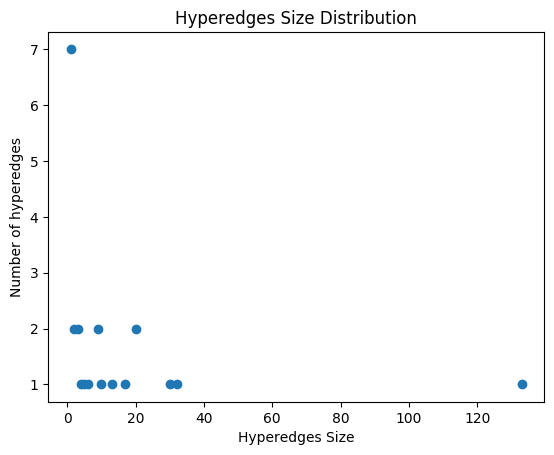

In [65]:
PyPlot.title("Hyperedges Size Distribution")
PyPlot.xlabel("Hyperedges Size")
PyPlot.ylabel("Number of hyperedges")

scatter(collect(keys(he_distribution)), collect(values(he_distribution)));

### Degree Distribution

In [66]:
using StatsBase

v_data = Dict{Int, Int}()

for v=1:nhv(fbh)
    push!(
        v_data,
        v => length(gethyperedges(fbh, v)))
end

v_data;
v_distribution = countmap(collect(values(v_data)))

Dict{Int64,Int64} with 2 entries:
  2 => 39
  1 => 247

# Environment Setup
1. Install Julia: https://julialang.org/downloads/
2. Install Atom: https://atom.io/
3. Install Juno: https://junolab.org

You can easily follow all the installation instruction at the following link http://docs.junolab.org/latest/man/installation/.

# How I made this presentation
1. Install Jupyter Notebook: https://jupyter.org/
2. Enable different cell types through View -> Cell Toolbar
    - `Slide` creates a new slide
    - `Fragment` creates a new piece within a slide

# Thank you for your attention
#### cspagnuolo@unisa.it